# Input the final names into the second block of code (if you changed the names from the FBRef data download file). Then run that block, then input the required info into the first block.
### No need to rerun the 2nd block. Just change the info in the first block and run!

Minutes: 2824 — 80 percentile


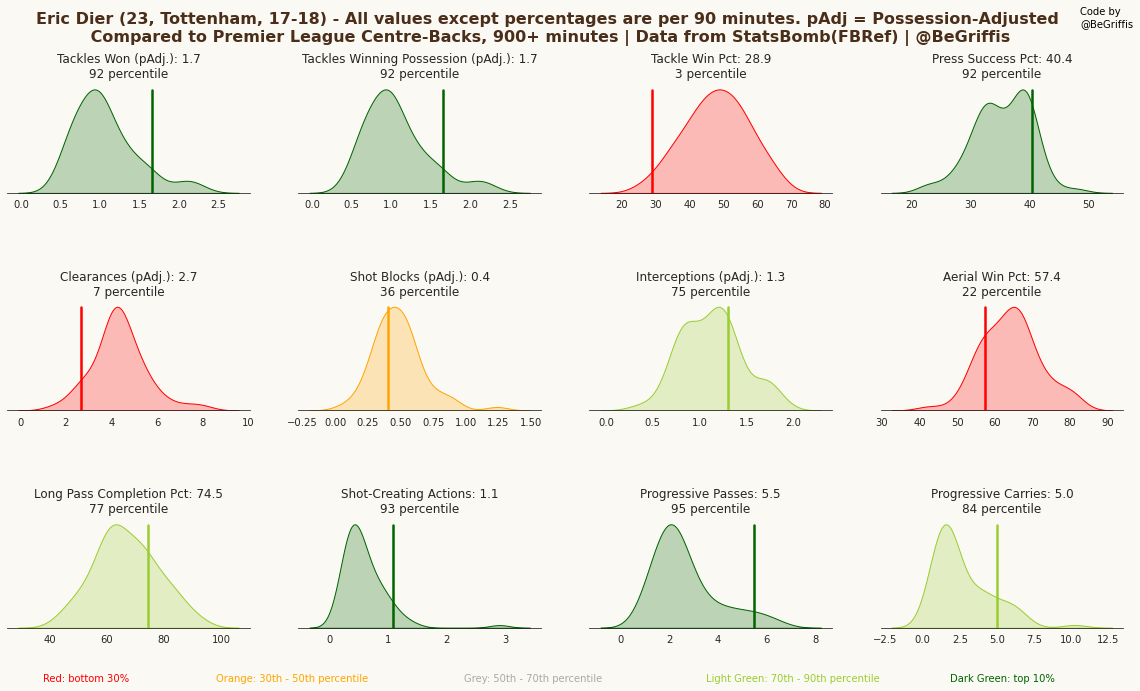

In [2]:
ScoutReport(season = '17-18',                # Season (17-18 to 22-23 (once the season starts))
            program = 'df',                  # Program to run (gk, df, mf, fw) - each has different metrics
            player_pos = 'Centre-Back',          # See options below
            playerPrompt = 'Eric Dier',  # Player name
            SquadPrompt = '',                # Optional. But Required for players who played for more than one team
            minutesPlayed = 900,             # The number of minutes to filter by
            compP = 'epl',          # OPTIONS: epl, la liga, bundesliga, serie a, ligue 1 ('n' will be all 5 leagues)
            saveinput = 'n',                 # 'y' if you want to save figure, 'n' if not
            signature = '@BeGriffis'         # Your twitter or website handle
           )

##### Single-Position Options #####
# Goalkeeper
# Centre-Back
# Left-Back
# Right-Back
# Defensive Midfield
# Central Midfield
# Left Midfield
# Right Midfield
# Attacking Midfield
# Left Winger
# Right Winger
# Second Striker
# Centre-Forward

##### Multiple Position Options #####
# Fullback (RB + LB)
# Midfielder (DM + CM + CAM)
# Winger (RM + LM + RW + RM))
# Forward (RW + LW + SS + ST)
# Striker (CF + SS)

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statistics import mean
from math import pi
import os
from pathlib import Path

# this is the file path root, i.e. where this file is located
root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'

# Set the default style to white
sns.set_style("white")


def ScoutReport(season, program, player_pos, playerPrompt, SquadPrompt, minutesPlayed, compP, saveinput, signature):
    # # Ask what file to use
    if season == "22-23":
        ssn = "22-23"
        if program == "gk":
            root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
            final_gk = 'Final FBRef GK 2022-2023' ####################################### INPUT FILE NAME HERE
            path = "%s%s.csv" %(root, final_gk)
        else:
            root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
            final_nongk = 'Final FBRef 2022-2023' ####################################### INPUT FILE NAME HERE
            path = "%s%s.csv" %(root, final_nongk)
    if season == "21-22":
        root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
        ssn = "21-22"
        if player_pos == "Goalkeeper":
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202021-2022.csv'
        else:
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202021-2022.csv'
    if season == "20-21":
        root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
        ssn = "20-21"
        if player_pos == "Goalkeeper":
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202020-2021.csv'
        else:
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202020-2021.csv'
    if season == "19-20":
        root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
        ssn = "19-20"
        if player_pos == "Goalkeeper":
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202019-2020.csv'
        else:
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202019-2020.csv'
    if season == "18-19":
        root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
        ssn = "18-19"
        if player_pos == "Goalkeeper":
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202018-2019.csv'
        else:
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202018-2019.csv'
    if season == "17-18":
        root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'
        ssn = "17-18"
        if player_pos == "Goalkeeper":
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%20GK%202017-2018.csv'
        else:
            path = 'https://raw.githubusercontent.com/griffisben/Soccer-Analyses/main/FBRef-Data/Final%20FBRef%202017-2018.csv'
            
########### I WILL UPDATE GITHUB IN THE FUTURE WITH CODE FOR PRIOR SEASONS ###########

    # Data
    df = pd.read_csv(path)
    df["AerialWin%"] = (df["AerialWins"]/(df["AerialWins"]+df["AerialLoss"]))*100
    df["Dispossessed"] = df["Disposesed"]
    df["DispossessedPer90"] = df["DisposesedPer90"]
    df["PctCmpFinal1/3"] = (df["Final1/3Cmp"]/df["PassesCompleted"])*100
    df["Comp"] = df["Comp"].replace("eng Premier League","Premier League")
    df["Comp"] = df["Comp"].replace("fr Ligue 1","Ligue 1")
    df["Comp"] = df["Comp"].replace("de Bundesliga","Bundesliga")
    df["Comp"] = df["Comp"].replace("it Serie A","Serie A")
    df["Comp"] = df["Comp"].replace("es La Liga","La Liga")
    df = df.fillna(0)



    def strikers():
        ##### STRIKERS #####

        f, axes = plt.subplots(3, 4, figsize=(20,10))

        # Filter data
        player = df[df['Player']==playerPrompt]
        dfFilt = df[df['Min']>=minutesPlayed]
        if ((player_pos == 'Goalkeeper') or
            (player_pos == 'Centre-Back') or
            (player_pos == 'Left-Back') or
            (player_pos == 'Right-Back') or
            (player_pos == 'Defensive Midfield') or
            (player_pos == 'Central Midfield') or
            (player_pos == 'Left Midfield') or
            (player_pos == 'Right Midfield') or
            (player_pos == 'Attacking Midfield') or
            (player_pos == 'Left Winger') or
            (player_pos == 'Right Winger') or
            (player_pos == 'Second Striker') or
            (player_pos == 'Centre-Forward')
           ):
            dfFilt = dfFilt[dfFilt['Main Position'].str.contains(player_pos)]
        if player_pos == 'Fullback':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Left-Back')) |
                            (dfFilt['Main Position'].str.contains('Right-Back'))]
        if player_pos == 'Midfielder':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Defensive Midfield')) |
                            (dfFilt['Main Position'].str.contains('Central Midfield')) |
                            (dfFilt['Main Position'].str.contains('Attacking Midfield'))]
        if player_pos == 'Winger':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Right Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
        if player_pos == 'Forward':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Centre-Forward')) |
                            (dfFilt['Main Position'].str.contains('Second Striker')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]


            
        if SquadPrompt != "":
            player = player[player['Squad']==SquadPrompt]
        if compP == "n":
            dfFilt = dfFilt
        if compP == "epl":
            dfFilt = dfFilt[dfFilt['Comp']=="Premier League"]
        if compP == "bundesliga":
            dfFilt = dfFilt[dfFilt['Comp']=="Bundesliga"]
        if compP == "la liga":
            dfFilt = dfFilt[dfFilt['Comp']=="La Liga"]
        if compP == "ligue 1":
            dfFilt = dfFilt[dfFilt['Comp']=="Ligue 1"]
        if compP == "serie a":
            dfFilt = dfFilt[dfFilt['Comp']=="Serie A"]
        Comp = player['Comp'].values[0]

        # Variables to be plotted
        stat1 = "GoalsPer90"
        stat2 = "xGPer90"
        stat3 = "AssistsPer90"
        stat4 = "xAPer90"
        stat5 = "DrbSucc%"
        stat6 = "G/SoT"
        stat7 = "SCA90"
        stat8 = "GCA90"
        stat9 = "ProgCarriesPer90"
        stat10 = "ProgPassesPer90"
        stat11 = "PressPer90"
        stat12 = "AerialWin%"
        #Get the specific player's value (and name)
        x1 = player[stat1].values[0]
        x2 = player[stat2].values[0]
        x3 = player[stat3].values[0]
        x4 = player[stat4].values[0]
        x5 = player[stat5].values[0]
        x6 = player[stat6].values[0]
        x7 = player[stat7].values[0]
        x8 = player[stat8].values[0]
        x9 = player[stat9].values[0]
        x10 = player[stat10].values[0]
        x11 = player[stat11].values[0]
        x12 = player[stat12].values[0]
        playerName = player["Player"].values[0]
        teamName = player["Squad"].values[0]
        str_age = player["Age"][:2]
        age = str_age.values[0]
        minutes = player['Min'].values[0]

        # Calculate their percentile
        pct1 = stats.percentileofscore(dfFilt[stat1],x1)
        pct2 = stats.percentileofscore(dfFilt[stat2],x2)
        pct3 = stats.percentileofscore(dfFilt[stat3],x3)
        pct4 = stats.percentileofscore(dfFilt[stat4],x4)
        pct5 = stats.percentileofscore(dfFilt[stat5],x5)
        pct6 = stats.percentileofscore(dfFilt[stat6],x6)
        pct7 = stats.percentileofscore(dfFilt[stat7],x7)
        pct8 = stats.percentileofscore(dfFilt[stat8],x8)
        pct9 = stats.percentileofscore(dfFilt[stat9],x9)
        pct10 = stats.percentileofscore(dfFilt[stat10],x10)
        pct11 = stats.percentileofscore(dfFilt[stat11],x11)
        pct12 = stats.percentileofscore(dfFilt[stat12],x12)
        pctMins = stats.percentileofscore(dfFilt['Min'],minutes)

        if pct1 >= 90:
            col = "darkgreen"
        if 70 <= pct1 < 90:
            col = "yellowgreen"
        if 50 <= pct1 < 70:
            col = "darkgrey"
        if 30 <= pct1 < 50:
            col = "orange"
        if 0 <= pct1 < 30:
            col = "red"
        # The plot & player line
        ax1 = sns.kdeplot(dfFilt[stat1], color=col, fill=col, ax=axes[0,0])
        ax1.axvline(x1, 0, .95, lw=2.5, color=col)
        ## Percentile lines
        ax1.set_title("Goals: %.2f\n%i percentile" % (x1, pct1))
        # Clean graph
        ax1.set(xlabel=None)
        ax1.set(ylabel=None)
        ax1.set(yticks=[])

        if pct2 >= 90:
            col = "darkgreen"
        if 70 <= pct2 < 90:
            col = "yellowgreen"
        if 50 <= pct2 < 70:
            col = "darkgrey"
        if 30 <= pct2 < 50:
            col = "orange"
        if 0 <= pct2 < 30:
            col = "red"
        # The plot & player line
        ax2 = sns.kdeplot(dfFilt[stat2], color=col, fill=col, ax=axes[0,1])
        ax2.axvline(x2, 0, .95, lw=2.5, color=col)
        ax2.set_title("xG: %.2f\n%i percentile" % (x2, pct2))
        # Clean graph
        ax2.set(xlabel=None)
        ax2.set(ylabel=None)
        ax2.set(yticks=[])

        if pct3 >= 90:
            col = "darkgreen"
        if 70 <= pct3 < 90:
            col = "yellowgreen"
        if 50 <= pct3 < 70:
            col = "darkgrey"
        if 30 <= pct3 < 50:
            col = "orange"
        if 0 <= pct3 < 30:
            col = "red"
        # The plot & player line
        ax3 = sns.kdeplot(dfFilt[stat3], color=col, fill=col, ax=axes[0,2])
        ax3.axvline(x3, 0, .95, lw=2.5, color=col)
        ax3.set_title("Assists: %.2f\n%i percentile" % (x3, pct3))
        # Clean graph
        ax3.set(xlabel=None)
        ax3.set(ylabel=None)
        ax3.set(yticks=[])

        if pct4 >= 90:
            col = "darkgreen"
        if 70 <= pct4 < 90:
            col = "yellowgreen"
        if 50 <= pct4 < 70:
            col = "darkgrey"
        if 30 <= pct4 < 50:
            col = "orange"
        if 0 <= pct4 < 30:
            col = "red"
        # The plot & player line
        ax4 = sns.kdeplot(dfFilt[stat4], color=col, fill=col, ax=axes[0,3])
        ax4.axvline(x4, 0, .95, lw=2.5, color=col)
        ax4.set_title("xA: %.2f\n%i percentile" % (x4, pct4))
        # Clean graph
        ax4.set(xlabel=None)
        ax4.set(ylabel=None)
        ax4.set(yticks=[])

        if pct5 >= 90:
            col = "darkgreen"
        if 70 <= pct5 < 90:
            col = "yellowgreen"
        if 50 <= pct5 < 70:
            col = "darkgrey"
        if 30 <= pct5 < 50:
            col = "orange"
        if 0 <= pct5 < 30:
            col = "red"
        # The plot & player line
        ax5 = sns.kdeplot(dfFilt[stat5], color=col, fill=col, ax=axes[1,0])
        ax5.axvline(x5, 0, .95, lw=2.5, color=col)
        ax5.set_title("Dribble Success Pct: %.1f\n%i percentile" % (x5, pct5))
        # Clean graph
        ax5.set(xlabel=None)
        ax5.set(ylabel=None)
        ax5.set(yticks=[])

        if pct6 >= 90:
            col = "darkgreen"
        if 70 <= pct6 < 90:
            col = "yellowgreen"
        if 50 <= pct6 < 70:
            col = "darkgrey"
        if 30 <= pct6 < 50:
            col = "orange"
        if 0 <= pct6 < 30:
            col = "red"
        # The plot & player line
        ax6 = sns.kdeplot(dfFilt[stat6], color=col, fill=col, ax=axes[1,1])
        ax6.axvline(x6, 0, .95, lw=2.5, color=col)
        ax6.set_title("Goals per Shot on Target: %.2f\n%i percentile" % (x6, pct6))
        # Clean graph
        ax6.set(xlabel=None)
        ax6.set(ylabel=None)
        ax6.set(yticks=[])

        if pct7 >= 90:
            col = "darkgreen"
        if 70 <= pct7 < 90:
            col = "yellowgreen"
        if 50 <= pct7 < 70:
            col = "darkgrey"
        if 30 <= pct7 < 50:
            col = "orange"
        if 0 <= pct7 < 30:
            col = "red"
        # The plot & player line
        ax7 = sns.kdeplot(dfFilt[stat7], color=col, fill=col, ax=axes[1,2])
        ax7.axvline(x7, 0, .95, lw=2.5, color=col)
        ax7.set_title("Shot-Creating Actions: %.2f\n%i percentile" % (x7, pct7))
        # Clean graph
        ax7.set(xlabel=None)
        ax7.set(ylabel=None)
        ax7.set(yticks=[])

        if pct8 >= 90:
            col = "darkgreen"
        if 70 <= pct8 < 90:
            col = "yellowgreen"
        if 50 <= pct8 < 70:
            col = "darkgrey"
        if 30 <= pct8 < 50:
            col = "orange"
        if 0 <= pct8 < 30:
            col = "red"
        # The plot & player line
        ax8 = sns.kdeplot(dfFilt[stat8], color=col, fill=col, ax=axes[1,3])
        ax8.axvline(x8, 0, .95, lw=2.5, color=col)
        ax8.set_title("Goal-Creating Actions: %.2f\n%i percentile" % (x8, pct8))
        # Clean graph
        ax8.set(xlabel=None)
        ax8.set(ylabel=None)
        ax8.set(yticks=[])

        if pct9 >= 90:
            col = "darkgreen"
        if 70 <= pct9 < 90:
            col = "yellowgreen"
        if 50 <= pct9 < 70:
            col = "darkgrey"
        if 30 <= pct9 < 50:
            col = "orange"
        if 0 <= pct9 < 30:
            col = "red"
        # The plot & player line
        ax9 = sns.kdeplot(dfFilt[stat9], color=col, fill=col, ax=axes[2,0])
        ax9.axvline(x9, 0, .95, lw=2.5, color=col)
        ax9.set_title("Progressive Carries: %.1f\n%i percentile" % (x9, pct9))
        # Clean graph
        ax9.set(xlabel=None)
        ax9.set(ylabel=None)
        ax9.set(yticks=[])

        if pct10 >= 90:
            col = "darkgreen"
        if 70 <= pct10 < 90:
            col = "yellowgreen"
        if 50 <= pct10 < 70:
            col = "darkgrey"
        if 30 <= pct10 < 50:
            col = "orange"
        if 0 <= pct10 < 30:
            col = "red"
        # The plot & player line
        ax10 = sns.kdeplot(dfFilt[stat10], color=col, fill=col, ax=axes[2,1])
        ax10.axvline(x10, 0, .95, lw=2.5, color=col)
        ax10.set_title("Progressive Passes: %.1f\n%i percentile" % (x10, pct10))
        # Clean graph
        ax10.set(xlabel=None)
        ax10.set(ylabel=None)
        ax10.set(yticks=[])

        if pct11 >= 90:
            col = "darkgreen"
        if 70 <= pct11 < 90:
            col = "yellowgreen"
        if 50 <= pct11 < 70:
            col = "darkgrey"
        if 30 <= pct11 < 50:
            col = "orange"
        if 0 <= pct11 < 30:
            col = "red"
        # The plot & player line
        ax11 = sns.kdeplot(dfFilt[stat11], color=col, fill=col, ax=axes[2,2])
        ax11.axvline(x11, 0, .95, lw=2.5, color=col)
        ax11.set_title("Presses: %.1f\n%i percentile" % (x11, pct11))
        # Clean graph
        ax11.set(xlabel=None)
        ax11.set(ylabel=None)
        ax11.set(yticks=[])

        if pct12 >= 90:
            col = "darkgreen"
        if 70 <= pct12 < 90:
            col = "yellowgreen"
        if 50 <= pct12 < 70:
            col = "darkgrey"
        if 30 <= pct12 < 50:
            col = "orange"
        if 0 <= pct12 < 30:
            col = "red"
        # The plot & player line
        ax12 = sns.kdeplot(dfFilt[stat12], color=col, fill=col, ax=axes[2,3])
        ax12.axvline(x12, 0, .95, lw=2.5, color=col)
        ax12.set_title("Aerial Wins Pct: %.1f\n%i percentile" % (x12, pct12))
        # Clean graph
        ax12.set(xlabel=None)
        ax12.set(ylabel=None)
        ax12.set(yticks=[])

        # Finish the graphs
        sns.despine(left=True)
        plt.subplots_adjust(hspace = 1)
        plt.suptitle('%s (%i, %s, %s) - All values except percentages are per 90 minutes.\n Compared to %s %ss, %i+ minutes | Data from StatsBomb(FBRef) | %s'
                 % (playerName, int(age), teamName, ssn, Comp, player_pos, minutesPlayed, signature),
                 fontsize=16,
                color="#4A2E19", fontweight="bold", fontname="DejaVu Sans")
        plt.style.use("default")
        
        fig = plt.gcf()
        
        fig.text(0.15, .05,
                   'Red: bottom 30%',
                   fontsize=10, color='red')
        fig.text(0.27, .05,
                   'Orange: 30th - 50th percentile',
                   fontsize=10, color='orange')
        fig.text(0.4425, .05,
                   'Grey: 50th - 70th percentile',
                   fontsize=10, color='darkgrey')
        fig.text(0.61, .05,
                   'Light Green: 70th - 90th percentile',
                   fontsize=10, color='yellowgreen')
        fig.text(0.78, .05,
                   'Dark Green: top 10%',
                   fontsize=10, color='darkgreen')
        fig.text(0.87, .96,
                   'Code by\n@BeGriffis',
                   fontsize=10, color='black')
        
        fig.patch.set_facecolor('#fbf9f4')
        ax1.set_facecolor('#fbf9f4')
        ax2.set_facecolor('#fbf9f4')
        ax3.set_facecolor('#fbf9f4')
        ax4.set_facecolor('#fbf9f4')
        ax5.set_facecolor('#fbf9f4')
        ax6.set_facecolor('#fbf9f4')
        ax7.set_facecolor('#fbf9f4')
        ax8.set_facecolor('#fbf9f4')
        ax9.set_facecolor('#fbf9f4')
        ax10.set_facecolor('#fbf9f4')
        ax11.set_facecolor('#fbf9f4')
        ax12.set_facecolor('#fbf9f4')
        
        fig.set_size_inches(20, 10) #length, height
        if saveinput == "y":
            fig.savefig("%s%s %s fw.png" %(root, playerName, ssn), dpi=220)
        print("Minutes: %i — %i percentile" %(minutes,pctMins))
        fig = plt.gcf()
        fig.set_size_inches(20, 10) #length, height
        fig

    def midfielders():
        ##### MIDFIELDERS #####

        f, axes = plt.subplots(3, 4, figsize=(30,10))

        # Filter data
        player = df[df['Player']==playerPrompt]
        dfFilt = df[df['Min']>=minutesPlayed]
#         dfFilt = dfFilt[dfFilt['Pos'].str.contains(player_pos)]
        if ((player_pos == 'Goalkeeper') or
            (player_pos == 'Centre-Back') or
            (player_pos == 'Left-Back') or
            (player_pos == 'Right-Back') or
            (player_pos == 'Defensive Midfield') or
            (player_pos == 'Central Midfield') or
            (player_pos == 'Left Midfield') or
            (player_pos == 'Right Midfield') or
            (player_pos == 'Attacking Midfield') or
            (player_pos == 'Left Winger') or
            (player_pos == 'Right Winger') or
            (player_pos == 'Second Striker') or
            (player_pos == 'Centre-Forward')
           ):
            dfFilt = dfFilt[dfFilt['Main Position'].str.contains(player_pos)]
        if player_pos == 'Fullback':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Left-Back')) |
                            (dfFilt['Main Position'].str.contains('Right-Back'))]
        if player_pos == 'Midfielder':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Defensive Midfield')) |
                            (dfFilt['Main Position'].str.contains('Central Midfield')) |
                            (dfFilt['Main Position'].str.contains('Attacking Midfield'))]
        if player_pos == 'Winger':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Right Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
        if player_pos == 'Forward':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Centre-Forward')) |
                            (dfFilt['Main Position'].str.contains('Second Striker')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
            
        if SquadPrompt != "":
            player = player[player['Squad']==SquadPrompt]
        if compP == "n":
            dfFilt = dfFilt
        if compP == "epl":
            dfFilt = dfFilt[dfFilt['Comp']=="Premier League"]
        if compP == "bundesliga":
            dfFilt = dfFilt[dfFilt['Comp']=="Bundesliga"]
        if compP == "la liga":
            dfFilt = dfFilt[dfFilt['Comp']=="La Liga"]
        if compP == "ligue 1":
            dfFilt = dfFilt[dfFilt['Comp']=="Ligue 1"]
        if compP == "serie a":
            dfFilt = dfFilt[dfFilt['Comp']=="Serie A"]
        Comp = player['Comp'].values[0]

        # Variables to be plotted
        stat1 = "ShortPassCmp%"
        stat2 = "MedPassCmp%"
        stat3 = "LongPassCmp%"
        stat4 = "KeyPassesPer90"
        stat5 = "xAPer90"
        stat6 = "AssistsPer90"
        stat7 = "SCA90"
        stat8 = "GCA90"
        stat9 = "ProgPassesPer90"
        stat10 = "CarriesPer90"
        stat11 = "pAdjPressSuccPer90"
        stat12 = "pAdjTkl+IntPer90"
        
        #Get the specific player's value (and name)
        x1 = player[stat1].values[0]
        x2 = player[stat2].values[0]
        x3 = player[stat3].values[0]
        x4 = player[stat4].values[0]
        x5 = player[stat5].values[0]
        x6 = player[stat6].values[0]
        x7 = player[stat7].values[0]
        x8 = player[stat8].values[0]
        x9 = player[stat9].values[0]
        x10 = player[stat10].values[0]
        x11 = player[stat11].values[0]
        x12 = player[stat12].values[0]
        playerName = player["Player"].values[0]
        teamName = player["Squad"].values[0]
        str_age = player["Age"][:2]
        age = str_age.values[0]
        minutes = player['Min'].values[0]

        # Calculate their percentile
        pct1 = stats.percentileofscore(dfFilt[stat1],x1)
        pct2 = stats.percentileofscore(dfFilt[stat2],x2)
        pct3 = stats.percentileofscore(dfFilt[stat3],x3)
        pct4 = stats.percentileofscore(dfFilt[stat4],x4)
        pct5 = stats.percentileofscore(dfFilt[stat5],x5)
        pct6 = stats.percentileofscore(dfFilt[stat6],x6)
        pct7 = stats.percentileofscore(dfFilt[stat7],x7)
        pct8 = stats.percentileofscore(dfFilt[stat8],x8)
        pct9 = stats.percentileofscore(dfFilt[stat9],x9)
        pct10 = stats.percentileofscore(dfFilt[stat10],x10)
        pct11 = stats.percentileofscore(dfFilt[stat11],x11)
        pct12 = stats.percentileofscore(dfFilt[stat12],x12)
        pctMins = stats.percentileofscore(dfFilt['Min'],minutes)

        if pct1 >= 90:
            col = "darkgreen"
        if 70 <= pct1 < 90:
            col = "yellowgreen"
        if 50 <= pct1 < 70:
            col = "darkgrey"
        if 30 <= pct1 < 50:
            col = "orange"
        if 0 <= pct1 < 30:
            col = "red"
        # The plot & player line
        ax1 = sns.kdeplot(dfFilt[stat1], color=col, fill=col, ax=axes[0,0])
        ax1.axvline(x1, 0, .95, lw=2.5, color=col)
        ## Percentile lines
        ax1.set_title("Short Pass Completion Pct: %.1f\n%i percentile" % (x1, pct1))
        # Clean graph
        ax1.set(xlabel=None)
        ax1.set(ylabel=None)
        ax1.set(yticks=[])

        if pct2 >= 90:
            col = "darkgreen"
        if 70 <= pct2 < 90:
            col = "yellowgreen"
        if 50 <= pct2 < 70:
            col = "darkgrey"
        if 30 <= pct2 < 50:
            col = "orange"
        if 0 <= pct2 < 30:
            col = "red"
        # The plot & player line
        ax2 = sns.kdeplot(dfFilt[stat2], color=col, fill=col, ax=axes[0,1])
        ax2.axvline(x2, 0, .95, lw=2.5, color=col)
        ax2.set_title("Medium Pass Completion Pct: %.1f\n%i percentile" % (x2, pct2))
        # Clean graph
        ax2.set(xlabel=None)
        ax2.set(ylabel=None)
        ax2.set(yticks=[])

        if pct3 >= 90:
            col = "darkgreen"
        if 70 <= pct3 < 90:
            col = "yellowgreen"
        if 50 <= pct3 < 70:
            col = "darkgrey"
        if 30 <= pct3 < 50:
            col = "orange"
        if 0 <= pct3 < 30:
            col = "red"
        # The plot & player line
        ax3 = sns.kdeplot(dfFilt[stat3], color=col, fill=col, ax=axes[0,2])
        ax3.axvline(x3, 0, .95, lw=2.5, color=col)
        ax3.set_title("Long Pass Completion Pct: %.1f\n%i percentile" % (x3, pct3))
        # Clean graph
        ax3.set(xlabel=None)
        ax3.set(ylabel=None)
        ax3.set(yticks=[])

        if pct4 >= 90:
            col = "darkgreen"
        if 70 <= pct4 < 90:
            col = "yellowgreen"
        if 50 <= pct4 < 70:
            col = "darkgrey"
        if 30 <= pct4 < 50:
            col = "orange"
        if 0 <= pct4 < 30:
            col = "red"
        # The plot & player line
        ax4 = sns.kdeplot(dfFilt[stat4], color=col, fill=col, ax=axes[0,3])
        ax4.axvline(x4, 0, .95, lw=2.5, color=col)
        ax4.set_title("Key Passes: %.1f\n%i percentile" % (x4, pct4))
        # Clean graph
        ax4.set(xlabel=None)
        ax4.set(ylabel=None)
        ax4.set(yticks=[])

        if pct5 >= 90:
            col = "darkgreen"
        if 70 <= pct5 < 90:
            col = "yellowgreen"
        if 50 <= pct5 < 70:
            col = "darkgrey"
        if 30 <= pct5 < 50:
            col = "orange"
        if 0 <= pct5 < 30:
            col = "red"
        # The plot & player line
        ax5 = sns.kdeplot(dfFilt[stat5], color=col, fill=col, ax=axes[1,0])
        ax5.axvline(x5, 0, .95, lw=2.5, color=col)
        ax5.set_title("xA: %.2f\n%i percentile" % (x5, pct5))
        # Clean graph
        ax5.set(xlabel=None)
        ax5.set(ylabel=None)
        ax5.set(yticks=[])

        if pct6 >= 90:
            col = "darkgreen"
        if 70 <= pct6 < 90:
            col = "yellowgreen"
        if 50 <= pct6 < 70:
            col = "darkgrey"
        if 30 <= pct6 < 50:
            col = "orange"
        if 0 <= pct6 < 30:
            col = "red"
        # The plot & player line
        ax6 = sns.kdeplot(dfFilt[stat6], color=col, fill=col, ax=axes[1,1])
        ax6.axvline(x6, 0, .95, lw=2.5, color=col)
        ax6.set_title("Assists: %.1f\n%i percentile" % (x6, pct6))
        # Clean graph
        ax6.set(xlabel=None)
        ax6.set(ylabel=None)
        ax6.set(yticks=[])

        if pct7 >= 90:
            col = "darkgreen"
        if 70 <= pct7 < 90:
            col = "yellowgreen"
        if 50 <= pct7 < 70:
            col = "darkgrey"
        if 30 <= pct7 < 50:
            col = "orange"
        if 0 <= pct7 < 30:
            col = "red"
        # The plot & player line
        ax7 = sns.kdeplot(dfFilt[stat7], color=col, fill=col, ax=axes[1,2])
        ax7.axvline(x7, 0, .95, lw=2.5, color=col)
        ax7.set_title("Shot-Creating Actions: %.1f\n%i percentile" % (x7, pct7))
        # Clean graph
        ax7.set(xlabel=None)
        ax7.set(ylabel=None)
        ax7.set(yticks=[])

        if pct8 >= 90:
            col = "darkgreen"
        if 70 <= pct8 < 90:
            col = "yellowgreen"
        if 50 <= pct8 < 70:
            col = "darkgrey"
        if 30 <= pct8 < 50:
            col = "orange"
        if 0 <= pct8 < 30:
            col = "red"
        # The plot & player line
        ax8 = sns.kdeplot(dfFilt[stat8], color=col, fill=col, ax=axes[1,3])
        ax8.axvline(x8, 0, .95, lw=2.5, color=col)
        ax8.set_title("Goal-Creating Actions: %.1f\n%i percentile" % (x8, pct8))
        # Clean graph
        ax8.set(xlabel=None)
        ax8.set(ylabel=None)
        ax8.set(yticks=[])

        if pct9 >= 90:
            col = "darkgreen"
        if 70 <= pct9 < 90:
            col = "yellowgreen"
        if 50 <= pct9 < 70:
            col = "darkgrey"
        if 30 <= pct9 < 50:
            col = "orange"
        if 0 <= pct9 < 30:
            col = "red"
        # The plot & player line
        ax9 = sns.kdeplot(dfFilt[stat9], color=col, fill=col, ax=axes[2,0])
        ax9.axvline(x9, 0, .95, lw=2.5, color=col)
        ax9.set_title("Progressive Passes: %.1f\n%i percentile" % (x9, pct9))
        # Clean graph
        ax9.set(xlabel=None)
        ax9.set(ylabel=None)
        ax9.set(yticks=[])

        if pct10 >= 90:
            col = "darkgreen"
        if 70 <= pct10 < 90:
            col = "yellowgreen"
        if 50 <= pct10 < 70:
            col = "darkgrey"
        if 30 <= pct10 < 50:
            col = "orange"
        if 0 <= pct10 < 30:
            col = "red"
        # The plot & player line
        ax10 = sns.kdeplot(dfFilt[stat10], color=col, fill=col, ax=axes[2,1])
        ax10.axvline(x10, 0, .95, lw=2.5, color=col)
        ax10.set_title("Carries: %.1f\n%i percentile" % (x10, pct10))
        # Clean graph
        ax10.set(xlabel=None)
        ax10.set(ylabel=None)
        ax10.set(yticks=[])

        if pct11 >= 90:
            col = "darkgreen"
        if 70 <= pct11 < 90:
            col = "yellowgreen"
        if 50 <= pct11 < 70:
            col = "darkgrey"
        if 30 <= pct11 < 50:
            col = "orange"
        if 0 <= pct11 < 30:
            col = "red"
        # The plot & player line
        ax11 = sns.kdeplot(dfFilt[stat11], color=col, fill=col, ax=axes[2,2])
        ax11.axvline(x11, 0, .95, lw=2.5, color=col)
        ax11.set_title("Successful Presses (pAdj.): %.1f\n%i percentile" % (x11, pct11))
        # Clean graph
        ax11.set(xlabel=None)
        ax11.set(ylabel=None)
        ax11.set(yticks=[])

        if pct12 >= 90:
            col = "darkgreen"
        if 70 <= pct12 < 90:
            col = "yellowgreen"
        if 50 <= pct12 < 70:
            col = "darkgrey"
        if 30 <= pct12 < 50:
            col = "orange"
        if 0 <= pct12 < 30:
            col = "red"
        # The plot & player line
        ax12 = sns.kdeplot(dfFilt[stat12], color=col, fill=col, ax=axes[2,3])
        ax12.axvline(x12, 0, .95, lw=2.5, color=col)
        ax12.set_title("Tackles and Interceptions (pAdj.): %.1f\n%i percentile" % (x12, pct12))
        # Clean graph
        ax12.set(xlabel=None)
        ax12.set(ylabel=None)
        ax12.set(yticks=[])

        # Finish the graphs
        sns.despine(left=True)
        plt.subplots_adjust(hspace = 1)
        plt.suptitle('%s (%i, %s, %s) - All values except percentages are per 90 minutes. pAdj = Possession-Adjusted\n Compared to %s %ss, %i+ minutes | Data from StatsBomb(FBRef) | %s'
                     % (playerName, int(age), teamName, ssn, Comp, player_pos, minutesPlayed, signature),
                     fontsize=16,
                    color="#4A2E19", fontweight="bold", fontname="DejaVu Sans")
        plt.style.use("default")
        #f.style.use("Solarize_Light2")

        fig = plt.gcf()
        
        fig.text(0.15, .05,
                   'Red: bottom 30%',
                   fontsize=10, color='red')
        fig.text(0.27, .05,
                   'Orange: 30th - 50th percentile',
                   fontsize=10, color='orange')
        fig.text(0.4425, .05,
                   'Grey: 50th - 70th percentile',
                   fontsize=10, color='darkgrey')
        fig.text(0.61, .05,
                   'Light Green: 70th - 90th percentile',
                   fontsize=10, color='yellowgreen')
        fig.text(0.78, .05,
                   'Dark Green: top 10%',
                   fontsize=10, color='darkgreen')
        fig.text(0.87, .96,
                   'Code by\n@BeGriffis',
                   fontsize=10, color='black')
        
        fig.patch.set_facecolor('#fbf9f4')
        ax1.set_facecolor('#fbf9f4')
        ax2.set_facecolor('#fbf9f4')
        ax3.set_facecolor('#fbf9f4')
        ax4.set_facecolor('#fbf9f4')
        ax5.set_facecolor('#fbf9f4')
        ax6.set_facecolor('#fbf9f4')
        ax7.set_facecolor('#fbf9f4')
        ax8.set_facecolor('#fbf9f4')
        ax9.set_facecolor('#fbf9f4')
        ax10.set_facecolor('#fbf9f4')
        ax11.set_facecolor('#fbf9f4')
        ax12.set_facecolor('#fbf9f4')


        fig.set_size_inches(20, 10) #length, height
#         saveinput = input("Save figure? y/n ")
        if saveinput == "y":
            fig.savefig("%s%s %s mf.png" %(root, playerName, ssn), dpi=220)
        print("Minutes: %i — %i percentile" %(minutes,pctMins))
        fig = plt.gcf()
        fig.set_size_inches(20, 10) #length, height
        fig

    def defenders():
        ##### DEFENDERS #####

        f, axes = plt.subplots(3, 4, figsize=(30,10))

        # Variables to be plotted
        stat1 = "pAdjDrbTklPer90"
        stat2 = "pAdjTklWinPossPer90"
        stat3 = "DrbTkl%"
        stat4 = "PressSucc%"
        stat5 = "pAdjClrPer90"
        stat6 = "pAdjShBlocksPer90"
        stat7 = "pAdjIntPer90"
        stat8 = "AerialWin%"
        stat9 = "LongPassCmp%"
        stat10 = "SCA90"
        stat11 = "ProgPassesPer90"
        stat12 = "ProgCarriesPer90"
        # Filter data
        player = df[df['Player']==playerPrompt]
        dfFilt = df[df['Min']>=minutesPlayed]
#         dfFilt = dfFilt[dfFilt['Pos'].str.contains(player_pos)]
        if ((player_pos == 'Goalkeeper') or
            (player_pos == 'Centre-Back') or
            (player_pos == 'Left-Back') or
            (player_pos == 'Right-Back') or
            (player_pos == 'Defensive Midfield') or
            (player_pos == 'Central Midfield') or
            (player_pos == 'Left Midfield') or
            (player_pos == 'Right Midfield') or
            (player_pos == 'Attacking Midfield') or
            (player_pos == 'Left Winger') or
            (player_pos == 'Right Winger') or
            (player_pos == 'Second Striker') or
            (player_pos == 'Centre-Forward')
           ):
            dfFilt = dfFilt[dfFilt['Main Position'].str.contains(player_pos)]
        if player_pos == 'Fullback':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Left-Back')) |
                            (dfFilt['Main Position'].str.contains('Right-Back'))]
        if player_pos == 'Midfielder':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Defensive Midfield')) |
                            (dfFilt['Main Position'].str.contains('Central Midfield')) |
                            (dfFilt['Main Position'].str.contains('Attacking Midfield'))]
        if player_pos == 'Winger':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Right Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
        if player_pos == 'Forward':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Centre-Forward')) |
                            (dfFilt['Main Position'].str.contains('Second Striker')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
            
        if SquadPrompt != "":
            player = player[player['Squad']==SquadPrompt]
        if compP == "n":
            dfFilt = dfFilt
        if compP == "epl":
            dfFilt = dfFilt[dfFilt['Comp']=="Premier League"]
        if compP == "bundesliga":
            dfFilt = dfFilt[dfFilt['Comp']=="Bundesliga"]
        if compP == "la liga":
            dfFilt = dfFilt[dfFilt['Comp']=="La Liga"]
        if compP == "ligue 1":
            dfFilt = dfFilt[dfFilt['Comp']=="Ligue 1"]
        if compP == "serie a":
            dfFilt = dfFilt[dfFilt['Comp']=="Serie A"]
        Comp = player['Comp'].values[0]

        #Get the specific player's value (and name)
        x1 = player[stat1].values[0]
        x2 = player[stat2].values[0]
        x3 = player[stat3].values[0]
        x4 = player[stat4].values[0]
        x5 = player[stat5].values[0]
        x6 = player[stat6].values[0]
        x7 = player[stat7].values[0]
        x8 = player[stat8].values[0]
        x9 = player[stat9].values[0]
        x10 = player[stat10].values[0]
        x11 = player[stat11].values[0]
        x12 = player[stat12].values[0]
        playerName = player["Player"].values[0]
        teamName = player["Squad"].values[0]
        str_age = player["Age"][:2]
        age = str_age.values[0]
        minutes = player['Min'].values[0]

        # Calculate their percentile
        pct1 = stats.percentileofscore(dfFilt[stat1],x1)
        pct2 = stats.percentileofscore(dfFilt[stat2],x2)
        pct3 = stats.percentileofscore(dfFilt[stat3],x3)
        pct4 = stats.percentileofscore(dfFilt[stat4],x4)
        pct5 = stats.percentileofscore(dfFilt[stat5],x5)
        pct6 = stats.percentileofscore(dfFilt[stat6],x6)
        pct7 = stats.percentileofscore(dfFilt[stat7],x7)
        pct8 = stats.percentileofscore(dfFilt[stat8],x8)
        pct9 = stats.percentileofscore(dfFilt[stat9],x9)
        pct10 = stats.percentileofscore(dfFilt[stat10],x10)
        pct11 = stats.percentileofscore(dfFilt[stat11],x11)
        pct12 = stats.percentileofscore(dfFilt[stat12],x12)
        pctMins = stats.percentileofscore(dfFilt['Min'],minutes)
        

        if pct1 >= 90:
            col = "darkgreen"
        if 70 <= pct1 < 90:
            col = "yellowgreen"
        if 50 <= pct1 < 70:
            col = "darkgrey"
        if 30 <= pct1 < 50:
            col = "orange"
        if 0 <= pct1 < 30:
            col = "red"
        # The plot & player line
        ax1 = sns.kdeplot(dfFilt[stat1], color=col, fill=col, ax=axes[0,0])
        ax1.axvline(x1, 0, .95, lw=2.5, color=col)
        ## Percentile lines
        ax1.set_title("Tackles Won (pAdj.): %.1f\n%i percentile" % (x1, pct1))
        # Clean graph
        ax1.set(xlabel=None)
        ax1.set(ylabel=None)
        ax1.set(yticks=[])

        if pct2 >= 90:
            col = "darkgreen"
        if 70 <= pct2 < 90:
            col = "yellowgreen"
        if 50 <= pct2 < 70:
            col = "darkgrey"
        if 30 <= pct2 < 50:
            col = "orange"
        if 0 <= pct2 < 30:
            col = "red"
        # The plot & player line
        ax2 = sns.kdeplot(dfFilt[stat2], color=col, fill=col, ax=axes[0,1])
        ax2.axvline(x2, 0, .95, lw=2.5, color=col)
        ax2.set_title("Tackles Winning Possession (pAdj.): %.1f\n%i percentile" % (x2, pct2))
        # Clean graph
        ax2.set(xlabel=None)
        ax2.set(ylabel=None)
        ax2.set(yticks=[])

        if pct3 >= 90:
            col = "darkgreen"
        if 70 <= pct3 < 90:
            col = "yellowgreen"
        if 50 <= pct3 < 70:
            col = "darkgrey"
        if 30 <= pct3 < 50:
            col = "orange"
        if 0 <= pct3 < 30:
            col = "red"
        # The plot & player line
        ax3 = sns.kdeplot(dfFilt[stat3], color=col, fill=col, ax=axes[0,2])
        ax3.axvline(x3, 0, .95, lw=2.5, color=col)
        ax3.set_title("Tackle Win Pct: %.1f\n%i percentile" % (x3, pct3))
        # Clean graph
        ax3.set(xlabel=None)
        ax3.set(ylabel=None)
        ax3.set(yticks=[])

        if pct4 >= 90:
            col = "darkgreen"
        if 70 <= pct4 < 90:
            col = "yellowgreen"
        if 50 <= pct4 < 70:
            col = "darkgrey"
        if 30 <= pct4 < 50:
            col = "orange"
        if 0 <= pct4 < 30:
            col = "red"
        # The plot & player line
        ax4 = sns.kdeplot(dfFilt[stat4], color=col, fill=col, ax=axes[0,3])
        ax4.axvline(x4, 0, .95, lw=2.5, color=col)
        ax4.set_title("Press Success Pct: %.1f\n%i percentile" % (x4, pct4))
        # Clean graph
        ax4.set(xlabel=None)
        ax4.set(ylabel=None)
        ax4.set(yticks=[])

        if pct5 >= 90:
            col = "darkgreen"
        if 70 <= pct5 < 90:
            col = "yellowgreen"
        if 50 <= pct5 < 70:
            col = "darkgrey"
        if 30 <= pct5 < 50:
            col = "orange"
        if 0 <= pct5 < 30:
            col = "red"
        # The plot & player line
        ax5 = sns.kdeplot(dfFilt[stat5], color=col, fill=col, ax=axes[1,0])
        ax5.axvline(x5, 0, .95, lw=2.5, color=col)
        ax5.set_title("Clearances (pAdj.): %.1f\n%i percentile" % (x5, pct5))
        # Clean graph
        ax5.set(xlabel=None)
        ax5.set(ylabel=None)
        ax5.set(yticks=[])

        if pct6 >= 90:
            col = "darkgreen"
        if 70 <= pct6 < 90:
            col = "yellowgreen"
        if 50 <= pct6 < 70:
            col = "darkgrey"
        if 30 <= pct6 < 50:
            col = "orange"
        if 0 <= pct6 < 30:
            col = "red"
        # The plot & player line
        ax6 = sns.kdeplot(dfFilt[stat6], color=col, fill=col, ax=axes[1,1])
        ax6.axvline(x6, 0, .95, lw=2.5, color=col)
        ax6.set_title("Shot Blocks (pAdj.): %.1f\n%i percentile" % (x6, pct6))
        # Clean graph
        ax6.set(xlabel=None)
        ax6.set(ylabel=None)
        ax6.set(yticks=[])

        if pct7 >= 90:
            col = "darkgreen"
        if 70 <= pct7 < 90:
            col = "yellowgreen"
        if 50 <= pct7 < 70:
            col = "darkgrey"
        if 30 <= pct7 < 50:
            col = "orange"
        if 0 <= pct7 < 30:
            col = "red"
        # The plot & player line
        ax7 = sns.kdeplot(dfFilt[stat7], color=col, fill=col, ax=axes[1,2])
        ax7.axvline(x7, 0, .95, lw=2.5, color=col)
        ax7.set_title("Interceptions (pAdj.): %.1f\n%i percentile" % (x7, pct7))
        # Clean graph
        ax7.set(xlabel=None)
        ax7.set(ylabel=None)
        ax7.set(yticks=[])

        if pct8 >= 90:
            col = "darkgreen"
        if 70 <= pct8 < 90:
            col = "yellowgreen"
        if 50 <= pct8 < 70:
            col = "darkgrey"
        if 30 <= pct8 < 50:
            col = "orange"
        if 0 <= pct8 < 30:
            col = "red"
        # The plot & player line
        ax8 = sns.kdeplot(dfFilt[stat8], color=col, fill=col, ax=axes[1,3])
        ax8.axvline(x8, 0, .95, lw=2.5, color=col)
        ax8.set_title("Aerial Win Pct: %.1f\n%i percentile" % (x8, pct8))
        # Clean graph
        ax8.set(xlabel=None)
        ax8.set(ylabel=None)
        ax8.set(yticks=[])

        if pct9 >= 90:
            col = "darkgreen"
        if 70 <= pct9 < 90:
            col = "yellowgreen"
        if 50 <= pct9 < 70:
            col = "darkgrey"
        if 30 <= pct9 < 50:
            col = "orange"
        if 0 <= pct9 < 30:
            col = "red"
        # The plot & player line
        ax9 = sns.kdeplot(dfFilt[stat9], color=col, fill=col, ax=axes[2,0])
        ax9.axvline(x9, 0, .95, lw=2.5, color=col)
        ax9.set_title("Long Pass Completion Pct: %.1f\n%i percentile" % (x9, pct9))
        # Clean graph
        ax9.set(xlabel=None)
        ax9.set(ylabel=None)
        ax9.set(yticks=[])

        if pct10 >= 90:
            col = "darkgreen"
        if 70 <= pct10 < 90:
            col = "yellowgreen"
        if 50 <= pct10 < 70:
            col = "darkgrey"
        if 30 <= pct10 < 50:
            col = "orange"
        if 0 <= pct10 < 30:
            col = "red"
        # The plot & player line
        ax10 = sns.kdeplot(dfFilt[stat10], color=col, fill=col, ax=axes[2,1])
        ax10.axvline(x10, 0, .95, lw=2.5, color=col)
        ax10.set_title("Shot-Creating Actions: %.1f\n%i percentile" % (x10, pct10))
        # Clean graph
        ax10.set(xlabel=None)
        ax10.set(ylabel=None)
        ax10.set(yticks=[])

        if pct11 >= 90:
            col = "darkgreen"
        if 70 <= pct11 < 90:
            col = "yellowgreen"
        if 50 <= pct11 < 70:
            col = "darkgrey"
        if 30 <= pct11 < 50:
            col = "orange"
        if 0 <= pct11 < 30:
            col = "red"
        # The plot & player line
        ax11 = sns.kdeplot(dfFilt[stat11], color=col, fill=col, ax=axes[2,2])
        ax11.axvline(x11, 0, .95, lw=2.5, color=col)
        ax11.set_title("Progressive Passes: %.1f\n%i percentile" % (x11, pct11))
        # Clean graph
        ax11.set(xlabel=None)
        ax11.set(ylabel=None)
        ax11.set(yticks=[])

        if pct12 >= 90:
            col = "darkgreen"
        if 70 <= pct12 < 90:
            col = "yellowgreen"
        if 50 <= pct12 < 70:
            col = "darkgrey"
        if 30 <= pct12 < 50:
            col = "orange"
        if 0 <= pct12 < 30:
            col = "red"
        # The plot & player line
        ax12 = sns.kdeplot(dfFilt[stat12], color=col, fill=col, ax=axes[2,3])
        ax12.axvline(x12, 0, .95, lw=2.5, color=col)
        ax12.set_title("Progressive Carries: %.1f\n%i percentile" % (x12, pct12))
        # Clean graph
        ax12.set(xlabel=None)
        ax12.set(ylabel=None)
        ax12.set(yticks=[])

        # Finish the graphs
        sns.despine(left=True)
        plt.subplots_adjust(hspace = 1)
        plt.suptitle('%s (%i, %s, %s) - All values except percentages are per 90 minutes. pAdj = Possession-Adjusted\n Compared to %s %ss, %i+ minutes | Data from StatsBomb(FBRef) | %s'
                     % (playerName, int(age), teamName, ssn, Comp, player_pos, minutesPlayed, signature),
                     fontsize=16,
                    color="#4A2E19", fontweight="bold", fontname="DejaVu Sans")
        plt.style.use("default")

        fig = plt.gcf()
        
        fig.text(0.15, .05,
                   'Red: bottom 30%',
                   fontsize=10, color='red')
        fig.text(0.27, .05,
                   'Orange: 30th - 50th percentile',
                   fontsize=10, color='orange')
        fig.text(0.4425, .05,
                   'Grey: 50th - 70th percentile',
                   fontsize=10, color='darkgrey')
        fig.text(0.61, .05,
                   'Light Green: 70th - 90th percentile',
                   fontsize=10, color='yellowgreen')
        fig.text(0.78, .05,
                   'Dark Green: top 10%',
                   fontsize=10, color='darkgreen')
        fig.text(0.87, .96,
                   'Code by\n@BeGriffis',
                   fontsize=10, color='black')
        
        fig.patch.set_facecolor('#fbf9f4')
        ax1.set_facecolor('#fbf9f4')
        ax2.set_facecolor('#fbf9f4')
        ax3.set_facecolor('#fbf9f4')
        ax4.set_facecolor('#fbf9f4')
        ax5.set_facecolor('#fbf9f4')
        ax6.set_facecolor('#fbf9f4')
        ax7.set_facecolor('#fbf9f4')
        ax8.set_facecolor('#fbf9f4')
        ax9.set_facecolor('#fbf9f4')
        ax10.set_facecolor('#fbf9f4')
        ax11.set_facecolor('#fbf9f4')
        ax12.set_facecolor('#fbf9f4')
        
        fig.set_size_inches(20, 10) #length, height
#         saveinput = input("Save figure? y/n ")
        if saveinput == "y":
            fig.savefig("%s%s %s df.png" %(root, playerName, ssn), dpi=220)
        print("Minutes: %i — %i percentile" %(minutes,pctMins))
        fig = plt.gcf()
        fig.set_size_inches(20, 10) #length, height
        fig

    def goalkeepers():
        ##### GOALKEEPERS #####

        f, axes = plt.subplots(3, 4, figsize=(30,10))

        # Variables to be plotted
        stat1 = "GAPer90"
        stat2 = "PSxG+/-"
        stat3 = "PSxG/SoT"
        stat4 = "PKSave%"
        stat5 = "CS%"
        stat6 = "RecovPer90"
        stat7 = "CrsStp%"
        stat8 = "GoalKicksAtt.1Per90"
        stat9 = "LaunchPassCmp%"
        stat10 = "AvgLen"
        stat11 = "#OPA/90"
        stat12 = "AvgDistOPA"
        # Filter data
        player = df[df['Player']==playerPrompt]
        dfFilt = df[df['Min']>=minutesPlayed]
#         dfFilt = dfFilt[dfFilt['Pos'].str.contains(player_pos)]
        if ((player_pos == 'Goalkeeper') or
            (player_pos == 'Centre-Back') or
            (player_pos == 'Left-Back') or
            (player_pos == 'Right-Back') or
            (player_pos == 'Defensive Midfield') or
            (player_pos == 'Central Midfield') or
            (player_pos == 'Left Midfield') or
            (player_pos == 'Right Midfield') or
            (player_pos == 'Attacking Midfield') or
            (player_pos == 'Left Winger') or
            (player_pos == 'Right Winger') or
            (player_pos == 'Second Striker') or
            (player_pos == 'Centre-Forward')
           ):
            dfFilt = dfFilt[dfFilt['Main Position'].str.contains(player_pos)]
        if player_pos == 'Fullback':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Left-Back')) |
                            (dfFilt['Main Position'].str.contains('Right-Back'))]
        if player_pos == 'Midfielder':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Defensive Midfield')) |
                            (dfFilt['Main Position'].str.contains('Central Midfield')) |
                            (dfFilt['Main Position'].str.contains('Attacking Midfield'))]
        if player_pos == 'Winger':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Right Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Midfield')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
        if player_pos == 'Forward':
            dfFilt = dfFilt[(dfFilt['Main Position'].str.contains('Centre-Forward')) |
                            (dfFilt['Main Position'].str.contains('Second Striker')) |
                            (dfFilt['Main Position'].str.contains('Left Winger')) |
                            (dfFilt['Main Position'].str.contains('Right Winger'))]
            
        if SquadPrompt != "":
            player = player[player['Squad']==SquadPrompt]
        if compP == "n":
            dfFilt = dfFilt
        if compP == "epl":
            dfFilt = dfFilt[dfFilt['Comp']=="Premier League"]
        if compP == "bundesliga":
            dfFilt = dfFilt[dfFilt['Comp']=="Bundesliga"]
        if compP == "la liga":
            dfFilt = dfFilt[dfFilt['Comp']=="La Liga"]
        if compP == "ligue 1":
            dfFilt = dfFilt[dfFilt['Comp']=="Ligue 1"]
        if compP == "serie a":
            dfFilt = dfFilt[dfFilt['Comp']=="Serie A"]
        Comp = player['Comp'].values[0]

        #Get the specific player's value (and name)
        x1 = player[stat1].values[0]
        x2 = player[stat2].values[0]
        x3 = player[stat3].values[0]
        x4 = player[stat4].values[0]
        x5 = player[stat5].values[0]
        x6 = player[stat6].values[0]
        x7 = player[stat7].values[0]
        x8 = player[stat8].values[0]
        x9 = player[stat9].values[0]
        x10 = player[stat10].values[0]
        x11 = player[stat11].values[0]
        x12 = player[stat12].values[0]
        playerName = player["Player"].values[0]
        teamName = player["Squad"].values[0]
        str_age = player["Age"][:2]
        age = str_age.values[0]
        minutes = player['Min'].values[0]

        # Calculate their percentile
        pct1 = 100-stats.percentileofscore(dfFilt[stat1],x1)
        pct2 = stats.percentileofscore(dfFilt[stat2],x2)
        pct3 = stats.percentileofscore(dfFilt[stat3],x3)
        pct4 = stats.percentileofscore(dfFilt[stat4],x4)
        pct5 = stats.percentileofscore(dfFilt[stat5],x5)
        pct6 = stats.percentileofscore(dfFilt[stat6],x6)
        pct7 = stats.percentileofscore(dfFilt[stat7],x7)
        pct8 = stats.percentileofscore(dfFilt[stat8],x8)
        pct9 = stats.percentileofscore(dfFilt[stat9],x9)
        pct10 = stats.percentileofscore(dfFilt[stat10],x10)
        pct11 = stats.percentileofscore(dfFilt[stat11],x11)
        pct12 = stats.percentileofscore(dfFilt[stat12],x12)

        if pct1 >= 90:
            col = "darkgreen"
        if 70 <= pct1 < 90:
            col = "yellowgreen"
        if 50 <= pct1 < 70:
            col = "darkgrey"
        if 30 <= pct1 < 50:
            col = "orange"
        if 0 <= pct1 < 30:
            col = "red"
        # The plot & player line
        ax1 = sns.kdeplot(dfFilt[stat1], color=col, fill=col, ax=axes[0,0])
        ax1.axvline(x1, 0, .95, lw=2.5, color=col)
        ax1.set_title("Goals Against: %.1f\n%i percentile" % (x1, pct1))
        # Clean graph
        ax1.set(xlabel=None)
        ax1.set(ylabel=None)
        ax1.set(yticks=[])

        if pct2 >= 90:
            col = "darkgreen"
        if 70 <= pct2 < 90:
            col = "yellowgreen"
        if 50 <= pct2 < 70:
            col = "darkgrey"
        if 30 <= pct2 < 50:
            col = "orange"
        if 0 <= pct2 < 30:
            col = "red"
        # The plot & player line
        ax2 = sns.kdeplot(dfFilt[stat2], color=col, fill=col, ax=axes[0,1])
        ax2.axvline(x2, 0, .95, lw=2.5, color=col)
        ax2.set_title("Post-Shot xG - Goals (not per90): %.2f\n%i percentile" % (x2, pct2))
        # Clean graph
        ax2.set(xlabel=None)
        ax2.set(ylabel=None)
        ax2.set(yticks=[])

        if pct3 >= 90:
            col = "darkgreen"
        if 70 <= pct3 < 90:
            col = "yellowgreen"
        if 50 <= pct3 < 70:
            col = "darkgrey"
        if 30 <= pct3 < 50:
            col = "orange"
        if 0 <= pct3 < 30:
            col = "red"
        # The plot & player line
        ax3 = sns.kdeplot(dfFilt[stat3], color=col, fill=col, ax=axes[0,2])
        ax3.axvline(x3, 0, .95, lw=2.5, color=col)
        ax3.set_title("Post-Shot xG/SoT Faced: %.1f\n%i percentile" % (x3, pct3))
        # Clean graph
        ax3.set(xlabel=None)
        ax3.set(ylabel=None)
        ax3.set(yticks=[])

        if pct4 >= 90:
            col = "darkgreen"
        if 70 <= pct4 < 90:
            col = "yellowgreen"
        if 50 <= pct4 < 70:
            col = "darkgrey"
        if 30 <= pct4 < 50:
            col = "orange"
        if 0 <= pct4 < 30:
            col = "red"
        # The plot & player line
        ax4 = sns.kdeplot(dfFilt[stat4], color=col, fill=col, ax=axes[0,3])
        ax4.axvline(x4, 0, .95, lw=2.5, color=col)
        ax4.set_title("Save Pct: %.1f\n%i percentile" % (x4, pct4))
        # Clean graph
        ax4.set(xlabel=None)
        ax4.set(ylabel=None)
        ax4.set(yticks=[])

        if pct5 >= 90:
            col = "darkgreen"
        if 70 <= pct5 < 90:
            col = "yellowgreen"
        if 50 <= pct5 < 70:
            col = "darkgrey"
        if 30 <= pct5 < 50:
            col = "orange"
        if 0 <= pct5 < 30:
            col = "red"
        # The plot & player line
        ax5 = sns.kdeplot(dfFilt[stat5], color=col, fill=col, ax=axes[1,0])
        ax5.axvline(x5, 0, .95, lw=2.5, color=col)
        ax5.set_title("Clean Sheet Pct: %.1f\n%i percentile" % (x5, pct5))
        # Clean graph
        ax5.set(xlabel=None)
        ax5.set(ylabel=None)
        ax5.set(yticks=[])

        if pct6 >= 90:
            col = "darkgreen"
        if 70 <= pct6 < 90:
            col = "yellowgreen"
        if 50 <= pct6 < 70:
            col = "darkgrey"
        if 30 <= pct6 < 50:
            col = "orange"
        if 0 <= pct6 < 30:
            col = "red"
        # The plot & player line
        ax6 = sns.kdeplot(dfFilt[stat6], color=col, fill=col, ax=axes[1,1])
        ax6.axvline(x6, 0, .95, lw=2.5, color=col)
        ax6.set_title("Loose Ball Recoveries: %.1f\n%i percentile" % (x6, pct6))
        # Clean graph
        ax6.set(xlabel=None)
        ax6.set(ylabel=None)
        ax6.set(yticks=[])

        if pct7 >= 90:
            col = "darkgreen"
        if 70 <= pct7 < 90:
            col = "yellowgreen"
        if 50 <= pct7 < 70:
            col = "darkgrey"
        if 30 <= pct7 < 50:
            col = "orange"
        if 0 <= pct7 < 30:
            col = "red"
        # The plot & player line
        ax7 = sns.kdeplot(dfFilt[stat7], color=col, fill=col, ax=axes[1,2])
        ax7.axvline(x7, 0, .95, lw=2.5, color=col)
        ax7.set_title("Crosses Stopped Pct: %.1f\n%i percentile" % (x7, pct7))
        # Clean graph
        ax7.set(xlabel=None)
        ax7.set(ylabel=None)
        ax7.set(yticks=[])

        if pct8 >= 90:
            col = "darkgreen"
        if 70 <= pct8 < 90:
            col = "yellowgreen"
        if 50 <= pct8 < 70:
            col = "darkgrey"
        if 30 <= pct8 < 50:
            col = "orange"
        if 0 <= pct8 < 30:
            col = "red"
        # The plot & player line
        ax8 = sns.kdeplot(dfFilt[stat8], color=col, fill=col, ax=axes[1,3])
        ax8.axvline(x8, 0, .95, lw=2.5, color=col)
        ax8.set_title("Passes Attempted: %.1f\n%i percentile" % (x8, pct8))
        # Clean graph
        ax8.set(xlabel=None)
        ax8.set(ylabel=None)
        ax8.set(yticks=[])

        if pct9 >= 90:
            col = "darkgreen"
        if 70 <= pct9 < 90:
            col = "yellowgreen"
        if 50 <= pct9 < 70:
            col = "darkgrey"
        if 30 <= pct9 < 50:
            col = "orange"
        if 0 <= pct9 < 30:
            col = "red"
        # The plot & player line
        ax9 = sns.kdeplot(dfFilt[stat9], color=col, fill=col, ax=axes[2,0])
        ax9.axvline(x9, 0, .95, lw=2.5, color=col)
        ax9.set_title("Launched Pass Completion Pct: %.1f\n%i percentile" % (x9, pct9))
        # Clean graph
        ax9.set(xlabel=None)
        ax9.set(ylabel=None)
        ax9.set(yticks=[])

        if pct10 >= 90:
            col = "darkgreen"
        if 70 <= pct10 < 90:
            col = "yellowgreen"
        if 50 <= pct10 < 70:
            col = "darkgrey"
        if 30 <= pct10 < 50:
            col = "orange"
        if 0 <= pct10 < 30:
            col = "red"
        # The plot & player line
        ax10 = sns.kdeplot(dfFilt[stat10], color=col, fill=col, ax=axes[2,1])
        ax10.axvline(x10, 0, .95, lw=2.5, color=col)
        ax10.set_title("Avg Length of Goal Kicks (yds): %.1f\n%i percentile" % (x10, pct10))
        # Clean graph
        ax10.set(xlabel=None)
        ax10.set(ylabel=None)
        ax10.set(yticks=[])

        if pct11 >= 90:
            col = "darkgreen"
        if 70 <= pct11 < 90:
            col = "yellowgreen"
        if 50 <= pct11 < 70:
            col = "darkgrey"
        if 30 <= pct11 < 50:
            col = "orange"
        if 0 <= pct11 < 30:
            col = "red"
        # The plot & player line
        ax11 = sns.kdeplot(dfFilt[stat11], color=col, fill=col, ax=axes[2,2])
        ax11.axvline(x11, 0, .95, lw=2.5, color=col)
        ax11.set_title("Defensive Actions Outside Box: %.2f\n%i percentile" % (x11, pct11))
        # Clean graph
        ax11.set(xlabel=None)
        ax11.set(ylabel=None)
        ax11.set(yticks=[])

        if pct12 >= 90:
            col = "darkgreen"
        if 70 <= pct12 < 90:
            col = "yellowgreen"
        if 50 <= pct12 < 70:
            col = "darkgrey"
        if 30 <= pct12 < 50:
            col = "orange"
        if 0 <= pct12 < 30:
            col = "red"
        # The plot & player line
        ax12 = sns.kdeplot(dfFilt[stat12], color=col, fill=col, ax=axes[2,3])
        ax12.axvline(x12, 0, .95, lw=2.5, color=col)
        ax12.set_title("Avg Dist. of Def. Actions Outside Box (yds): %.1f\n%i percentile" % (x12, pct12))
        # Clean graph
        ax12.set(xlabel=None)
        ax12.set(ylabel=None)
        ax12.set(yticks=[])

        # Finish the graphs
        sns.despine(left=True)
        plt.subplots_adjust(hspace = 1)
        plt.suptitle('%s (%i, %s, %s) - All values except percentages & distance are per 90 minutes.\n Compared to %s %ss, %i+ minutes | Data from StatsBomb(FBRef) | %s'
                     % (playerName, int(age), teamName, ssn, Comp, player_pos, minutesPlayed, signature),
                     fontsize=18,
                    color="#4A2E19", fontweight="bold", fontname="DejaVu Sans")
        plt.style.use("default")

        fig = plt.gcf()
        
        fig.text(0.15, .05,
                   'Red: bottom 30%',
                   fontsize=10, color='red')
        fig.text(0.27, .05,
                   'Orange: 30th - 50th percentile',
                   fontsize=10, color='orange')
        fig.text(0.4425, .05,
                   'Grey: 50th - 70th percentile',
                   fontsize=10, color='darkgrey')
        fig.text(0.61, .05,
                   'Light Green: 70th - 90th percentile',
                   fontsize=10, color='yellowgreen')
        fig.text(0.78, .05,
                   'Dark Green: top 10%',
                   fontsize=10, color='darkgreen')
        fig.text(0.87, .96,
                   'Code by\n@BeGriffis',
                   fontsize=10, color='black')
        
        fig.patch.set_facecolor('#fbf9f4')
        ax1.set_facecolor('#fbf9f4')
        ax2.set_facecolor('#fbf9f4')
        ax3.set_facecolor('#fbf9f4')
        ax4.set_facecolor('#fbf9f4')
        ax5.set_facecolor('#fbf9f4')
        ax6.set_facecolor('#fbf9f4')
        ax7.set_facecolor('#fbf9f4')
        ax8.set_facecolor('#fbf9f4')
        ax9.set_facecolor('#fbf9f4')
        ax10.set_facecolor('#fbf9f4')
        ax11.set_facecolor('#fbf9f4')
        ax12.set_facecolor('#fbf9f4')
        
        fig.set_size_inches(20, 10) #length, height
#         saveinput = input("Save figure? y/n ")
        if saveinput == "y":
            fig.savefig("%s%s %s gk.png" %(root, playerName, ssn), dpi=220)
        print("Minutes: %i" %minutes)
        fig = plt.gcf()
        fig.set_size_inches(20, 10) #length, height
        fig

    def main():
#         qq = input("What program? fw/mf/df/gk ")
        if program == "fw":
            strikers()
        if program == "mf":
            midfielders()
        if program == "df":
            defenders()
        if program == "gk":
            goalkeepers()
    main()